<a href="https://colab.research.google.com/github/ShashwatVv/naiveDL/blob/main/CNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.signal import convolve2d
from imageio import imread

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

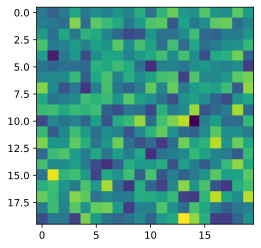

In [2]:
## performing convolution

imgN = 20 ## dimension n--> for  an image[let's consider nXn for now]
image = np.random.randn(imgN, imgN)
plt.imshow(image)


In [ ]:
## creating a gaussian kernel
kernel = np